In [ ]:
# đọc file
filename='NLP.txt'
lines=[]
count=0
#Max=-1
Max=1000
with open(filename,'r',encoding='utf-8') as f:
    for s in f:
        count+=1
        if count>Max and Max!=-1:
            break
        lines.append(s.strip())
print(len(lines))
print(lines[:5])          

14
['Nga không kích nhiều mục tiêu ở Syria tuần qua, trong đó có căn cứ lực lượng Mỹ sử dụng, làm tăng lo ngại về nguy cơ xung đột trực diện.', 'Giới chức quân đội Mỹ cho biết không quân Nga thời gian qua tiến hành hàng loạt vụ không kích nhắm vào những lực lượng thân Mỹ tại Syria, khiến Lầu Năm Góc tăng lo ngại nguy cơ tính toán sai lầm dẫn đến xung đột ngoài ý muốn giữa hai cường quốc.', 'Giới quan sát cho rằng nỗi lo này là có cơ sở, trong bối cảnh căng thẳng giữa hai nước vốn đã leo thang nghiêm trọng sau khi Nga mở chiến dịch quân sự đặc biệt ở Ukraine, còn Washington liên tục bơm vũ khí cho Kiev, bất chấp mọi cảnh báo từ Moskva.', 'Nỗi quan ngại lên đến đỉnh điểm hôm 15/6, khi không quân Nga tấn công căn cứ quân sự al-Tanf, gần biên giới Syria - Jordan. Đây là nơi cố vấn Mỹ huấn luyện nhóm dân quân Maghawir al-Thawra được Washington hậu thuẫn, với cái cớ ngăn phiến quân Nhà nước Hồi giáo (IS) tự sưng trỗi dậy.', 'Phía Nga đã báo trước cho Mỹ về cuộc không kích thông qua đường dây

In [ ]:
!pip install underthesea

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.6 MB 1.1 MB/s 
     |████████████████████████████████| 235 kB 52.4 MB/s 
     |████████████████████████████████| 965 kB 42.4 MB/s 
     |████████████████████████████████| 581 kB 47.2 MB/s 


In [ ]:
# tokenize sentences 
import underthesea
sentences=[]
all_tokens_count=0
for line in lines:
    tokens = underthesea.word_tokenize(line.lower())
    all_tokens_count+=len(tokens)
    #sentences.append(tokens)
    sentences.append(['<s>']+tokens+['</s>'])
print('all_tokens_count=',all_tokens_count)
print(len(sentences))
print(sentences[:5])

all_tokens_count= 747
14
[['<s>', 'nga', 'không kích', 'nhiều', 'mục tiêu', 'ở', 'syria', 'tuần', 'qua', ',', 'trong', 'đó', 'có', 'căn cứ', 'lực lượng', 'mỹ', 'sử dụng', ',', 'làm', 'tăng', 'lo ngại', 'về', 'nguy cơ', 'xung đột', 'trực diện', '.', '</s>'], ['<s>', 'giới chức', 'quân đội', 'mỹ', 'cho', 'biết', 'không quân', 'nga', 'thời gian', 'qua', 'tiến hành', 'hàng loạt', 'vụ', 'không kích', 'nhắm', 'vào', 'những', 'lực lượng', 'thân', 'mỹ', 'tại', 'syria', ',', 'khiến', 'lầu', 'năm', 'góc', 'tăng', 'lo ngại', 'nguy cơ', 'tính toán', 'sai lầm', 'dẫn', 'đến', 'xung đột', 'ngoài', 'ý muốn', 'giữa', 'hai', 'cường quốc', '.', '</s>'], ['<s>', 'giới', 'quan sát', 'cho', 'rằng', 'nỗi', 'lo', 'này', 'là', 'có', 'cơ sở', ',', 'trong', 'bối cảnh', 'căng thẳng', 'giữa', 'hai', 'nước', 'vốn', 'đã', 'leo thang', 'nghiêm trọng', 'sau', 'khi', 'nga', 'mở', 'chiến dịch', 'quân sự', 'đặc biệt', 'ở', 'ukraine', ',', 'còn', 'washington', 'liên tục', 'bơm', 'vũ khí', 'cho', 'kiev', ',', 'bất chấp', '

In [ ]:
# tạo dữ liệu training w(i-k)...w(i-1) dự đoán w(i)
import random 
def get_instances(sent):
    # tạo random t instances từ câu này
    n=len(sent)
    index=set()
    samples=[]
    for i in range(n//2):
        index.add(random.randint(1,n-1))
    for k in index:
        instance=sent[:k+1]
        samples.append(instance)
    return samples 

data=[]
for sent in sentences:
    data.extend(get_instances(sent))
print(len(data))

# test thử hàm get_instances
'''
samples = get_instances(sentences[0])
for instance in samples:
    print(instance)
'''

303


'\nsamples = get_instances(sentences[0])\nfor instance in samples:\n    print(instance)\n'

In [ ]:
%pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


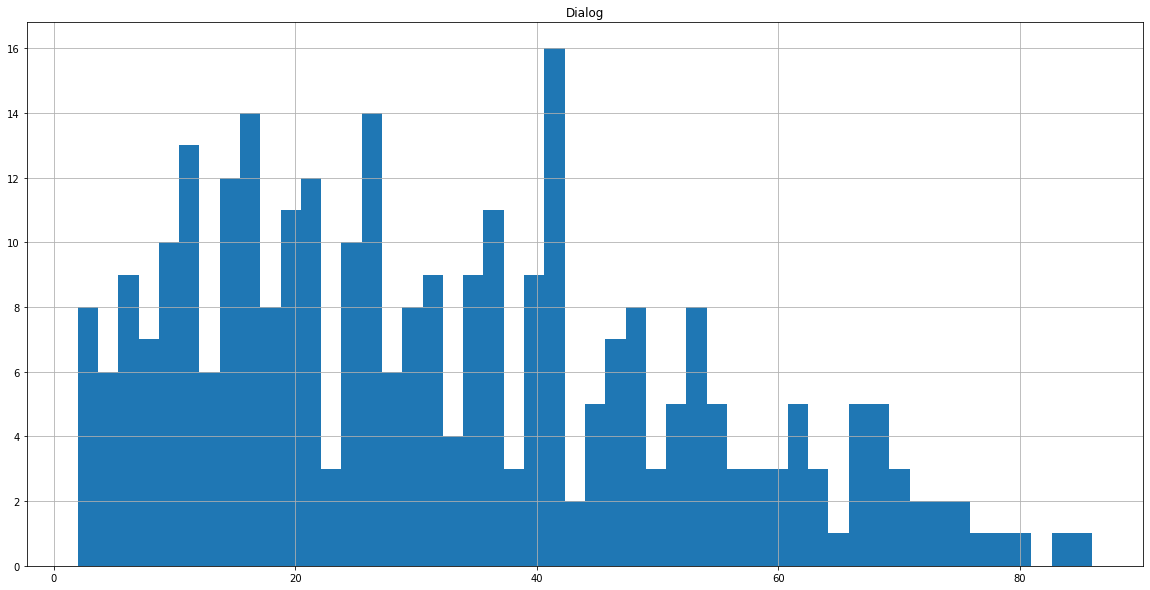

In [ ]:
# bản đồ histogram của data 
import pandas as pd
import matplotlib.pyplot as plt
alllength = [len(x) for x in data]
plt.rcParams['figure.figsize'] = (20, 10)
length_df = pd.DataFrame({'Dialog':alllength})
length_df.hist(bins=50)
plt.show()

In [ ]:
!pip install tensorflow

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow import keras
from sklearn.metrics import confusion_matrix,f1_score,classification_report

In [ ]:
# lấy max của độ dài để dự đoán từ tiếp theo
max_sequence_len=20

data1 = [' '.join(x) for x in data]

tokenizer = Tokenizer(filters='') 
tokenizer.fit_on_texts(data1)
#print(tokenizer.word_index)
vocab_size = len(tokenizer.word_index) + 1
print('vocab size:',vocab_size)

vocab size: 386


In [ ]:
# chuẩn hoá input
data_sequence = tokenizer.texts_to_sequences(data1)
y_data=np.array([x[-1:] for x in data_sequence])
y_data=y_data.ravel()
X_data = pad_sequences(data_sequence,  maxlen=max_sequence_len, padding='pre')
print(X_data[:3])

[[  0   0   0   0   0   0   0   0   0   0   0   0   4   5   7   9  96 136
  137  13]
 [  0   0   0   0   0   0   0   0   0   0   4   5   7   9  96 136 137  13
    8  36]
 [  0   0   0   0   0   0   0   0   0   4   5   7   9  96 136 137  13   8
   36  21]]


In [ ]:
print(X_data[:3])
print(y_data[:3])

[[  0   0   0   0   0   0   0   0   0   0   0   0   4   5   7   9  96 136
  137  13]
 [  0   0   0   0   0   0   0   0   0   0   4   5   7   9  96 136 137  13
    8  36]
 [  0   0   0   0   0   0   0   0   0   4   5   7   9  96 136 137  13   8
   36  21]]
[13 36 21]


In [ ]:
#y_data = keras.utils.to_categorical(y_data,num_classes=vocab_size)
print(y_data.shape)
print(y_data[0])

(303,)
13


In [ ]:
def get_params():
    return {'max_seq_len': max_sequence_len, 'vocab_size':vocab_size }
params = get_params()

inputs = keras.layers.Input(shape=(params['max_seq_len'],))
embedding = keras.layers.Embedding(params['vocab_size'], 200, input_length=params['max_seq_len'])(inputs)
print(inputs.shape)
print(embedding.shape)

(None, 20)
(None, 20, 200)


In [ ]:
# building CNN model
conv1 = keras.layers.Conv1D(filters=32, kernel_size=2, activation='relu')(embedding)
conv1 = keras.layers.Flatten()(conv1)
dense = keras.layers.Dense(128, activation='relu')(conv1)
dense = keras.layers.Dense(vocab_size, activation='softmax')(dense)
model = keras.Model(inputs=inputs, outputs=dense)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd',metrics=['accuracy'])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 20)]              0         
                                                                 
 embedding (Embedding)       (None, 20, 200)           77200     
                                                                 
 conv1d_1 (Conv1D)           (None, 19, 32)            12832     
                                                                 
 flatten_1 (Flatten)         (None, 608)               0         
                                                                 
 dense_2 (Dense)             (None, 127)               77343     
                                                                 
 dense_3 (Dense)             (None, 386)               49408     
                                                                 
Total params: 216,783
Trainable params: 216,783
Non-trainab

In [ ]:
type(y_data),len(y_data)

(numpy.ndarray, 303)

In [ ]:
print(X_data.shape)
model.fit(X_data,y_data,batch_size=100, epochs=3)
   

(303, 20)
Epoch 1/3
4/4 [==============================] - 1s 13ms/step - loss: 5.9596 - accuracy: 0.0000e+00
Epoch 2/3
4/4 [==============================] - 0s 12ms/step - loss: 5.9591 - accuracy: 0.0000e+00
Epoch 3/3
4/4 [==============================] - 0s 12ms/step - loss: 5.9586 - accuracy: 0.0033


In [ ]:
inputs2 = keras.layers.Input(shape=(params['max_seq_len'],))
embedding2 = keras.layers.Embedding(params['vocab_size'], 200, input_length=params['max_seq_len'])(inputs2)
# building CNN model
gru = keras.layers.GRU(100)(embedding2)
dense2 = keras.layers.Dense(128, activation='relu')(gru)
dense2 = keras.layers.Dense(vocab_size, activation='softmax')(dense2)
model2 = keras.Model(inputs=inputs2, outputs=dense2)
model2.compile(loss='sparse_categorical_crossentropy', optimizer='sgd',metrics=['accuracy'])
model2.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 20)]              0         
                                                                 
 embedding_6 (Embedding)     (None, 20, 200)           77200     
                                                                 
 gru_1 (GRU)                 (None, 100)               90600     
                                                                 
 dense_8 (Dense)             (None, 128)               12928     
                                                                 
 dense_9 (Dense)             (None, 386)               49794     
                                                                 
Total params: 230,522
Trainable params: 230,522
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.fit(X_data,y_data,batch_size=100, epochs=3)   

Epoch 1/3
78/78 [==============================] - 7s 87ms/step - loss: 6.7176 - accuracy: 0.0592
Epoch 2/3
78/78 [==============================] - 6s 75ms/step - loss: 5.5215 - accuracy: 0.0719
Epoch 3/3
78/78 [==============================] - 6s 74ms/step - loss: 5.1566 - accuracy: 0.0888
